In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.express as px

In [2]:
assets = {
    "SPY": "SPY",        # mercado general USA
    "QQQ": "QQQ",        # tecnología
    "XLE": "XLE",        # energía
    "BTC": "BTC-USD"     # crypto / liquidez global
}

In [3]:
data = yf.download(
    list(assets.values()),
    start="2015-01-01",
    auto_adjust=True
)["Close"]

data.tail()

[*********************100%***********************]  4 of 4 completed


Ticker           BTC-USD         QQQ         SPY        XLE
Date                                                       
2026-02-20  68005.421875  608.809998  689.429993  54.880001
2026-02-21  68003.765625         NaN         NaN        NaN
2026-02-22  67659.390625         NaN         NaN        NaN
2026-02-23  64616.738281  601.409973  682.390015  55.150002
2026-02-24  63088.492188         NaN         NaN        NaN

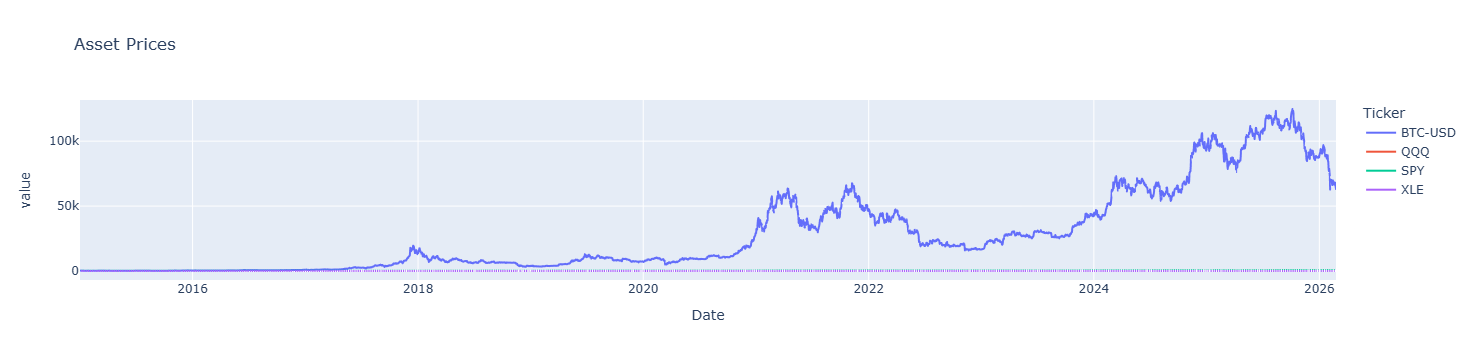

In [4]:
fig = px.line(
    data,
    title="Asset Prices"
)

fig.show()

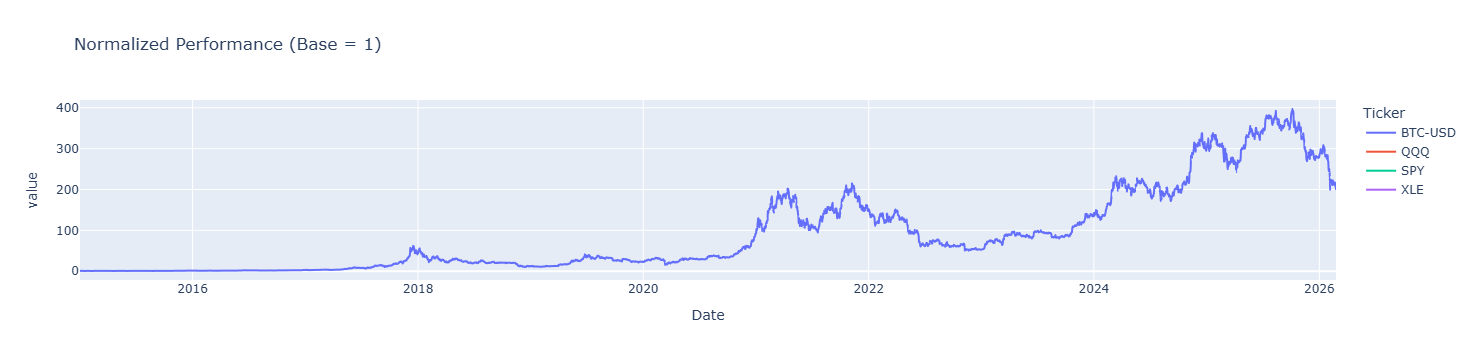

In [5]:
normalized = data / data.iloc[0]

fig = px.line(
    normalized,
    title="Normalized Performance (Base = 1)"
)

fig.show()

In [7]:
returns = data.pct_change().dropna()

returns.head()

Ticker       BTC-USD       QQQ       SPY       XLE
Date                                              
2015-01-06  0.042682 -0.013408 -0.009419 -0.014691
2015-01-07  0.028471  0.012891  0.012461  0.002130
2015-01-08 -0.037331  0.019140  0.017745  0.022450
2015-01-09  0.024913 -0.006583 -0.008013 -0.007926
2015-01-13 -0.156593 -0.000295 -0.002813 -0.007956

In [18]:
from pathlib import Path

BASE_DIR = Path().resolve().parent
DATA_DIR = BASE_DIR / "data"

DATA_DIR.mkdir(exist_ok=True)

data.to_csv(DATA_DIR / "market_prices.csv")
returns.to_csv(DATA_DIR / "market_returns.csv")

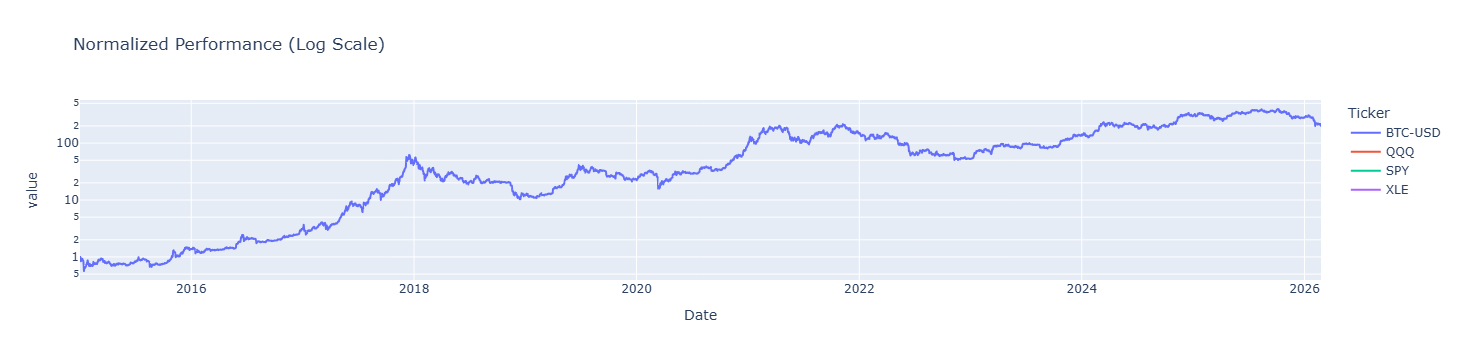

In [12]:
fig = px.line(
    normalized,
    title="Normalized Performance (Log Scale)",
    log_y=True
)

fig.show()

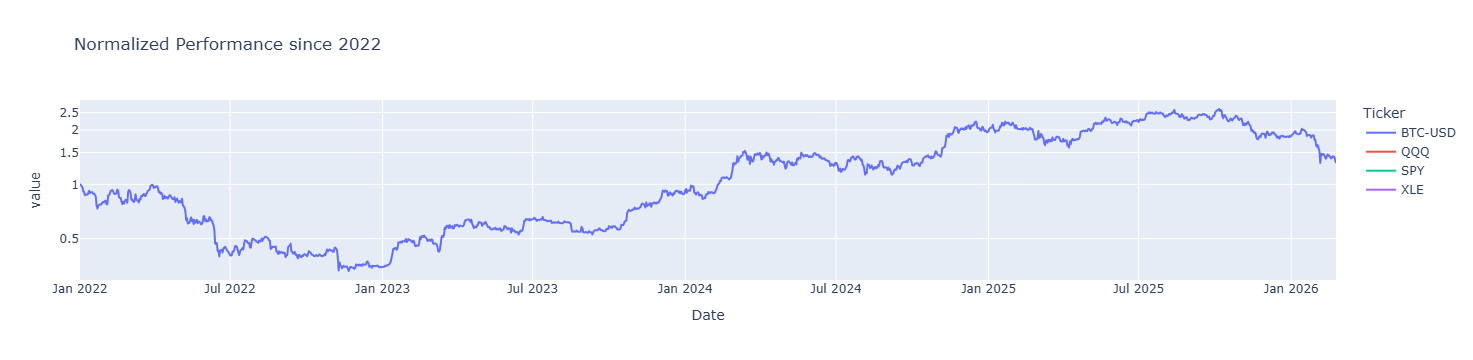

In [23]:
recent = data.loc["2022":]
normalized_recent = recent / recent.iloc[0]

px.line(
    normalized_recent,
    title="Normalized Performance since 2022",
    log_y=True
)

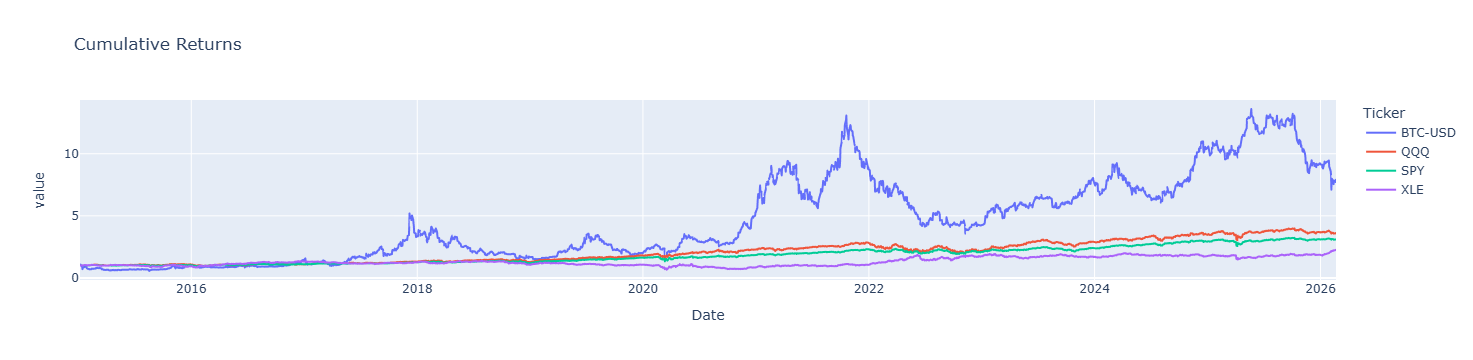

In [13]:
cum_returns = (1 + returns).cumprod()

px.line(
    cum_returns,
    title="Cumulative Returns"
)

In [25]:
rolling_perf = (1 + returns).rolling(252).apply(np.prod, raw=True)

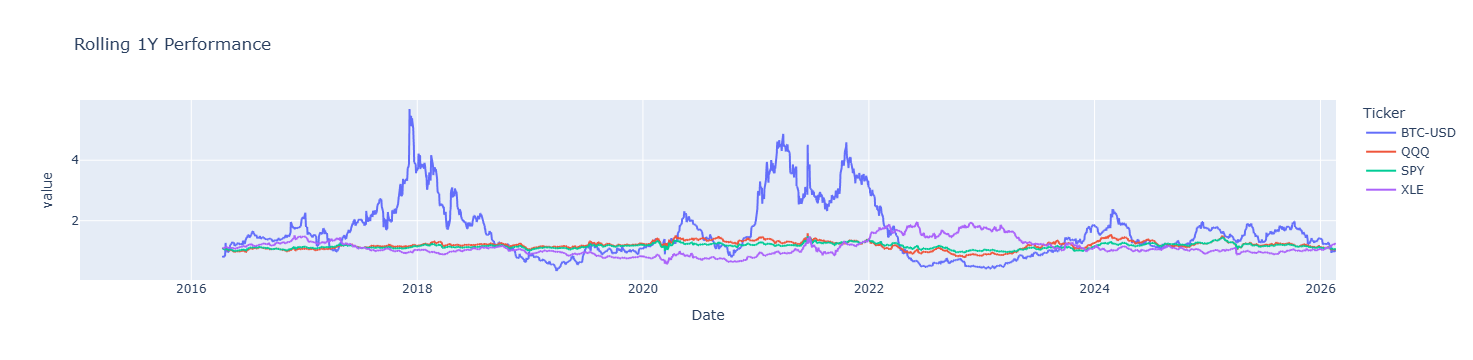

In [27]:
px.line(
    rolling_perf,
    title="Rolling 1Y Performance"
)

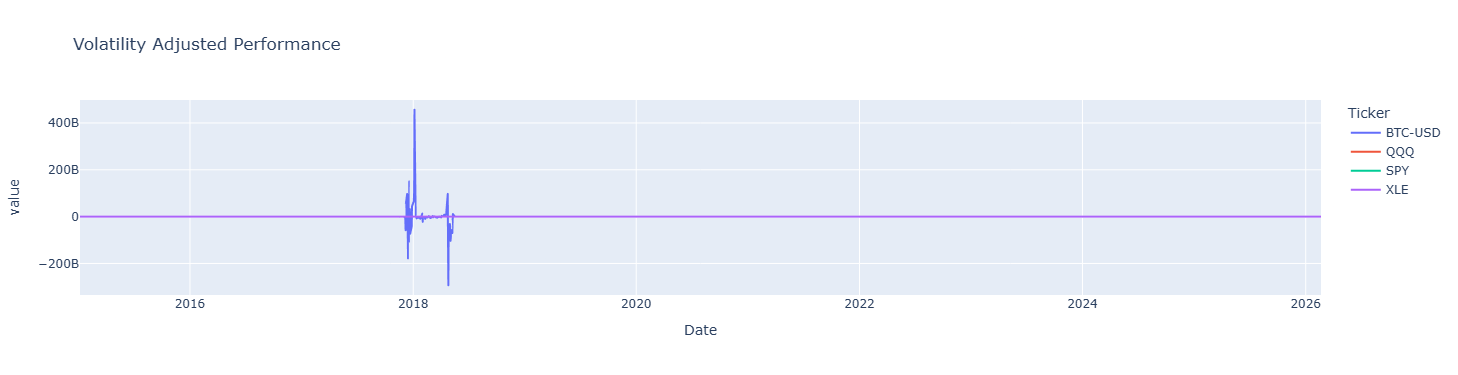

In [28]:
vol_scaled = returns / returns.std() #look biased ahead, use volatilidad general que contiene datos futuros para normalizar retornos, lo correcto es rolling volatility

cum_scaled = (1 + vol_scaled).cumprod()

px.line(
    cum_scaled,
    title="Volatility Adjusted Performance" #  Esto es incorrecto financieramente porque estamos acumulando retornos normalizados por volatilidad
)

In [29]:
scaled_returns = returns / returns.rolling(90).std()

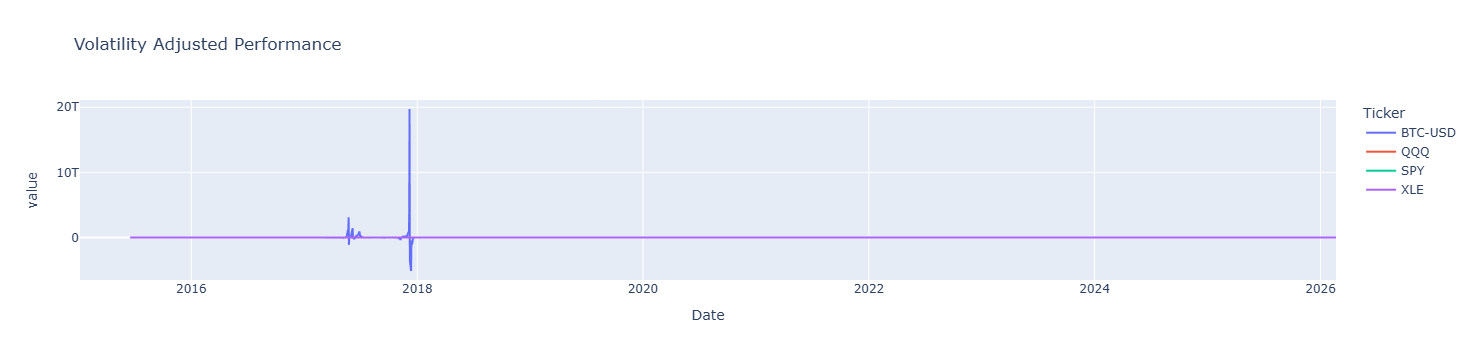

In [30]:
scaled_perf = (1 + scaled_returns).cumprod()

px.line(
    scaled_perf,
    title="Volatility Adjusted Performance"  # Esto es incorrecto financieramente porque estamos acumulando retornos normalizados por volatilidad
)

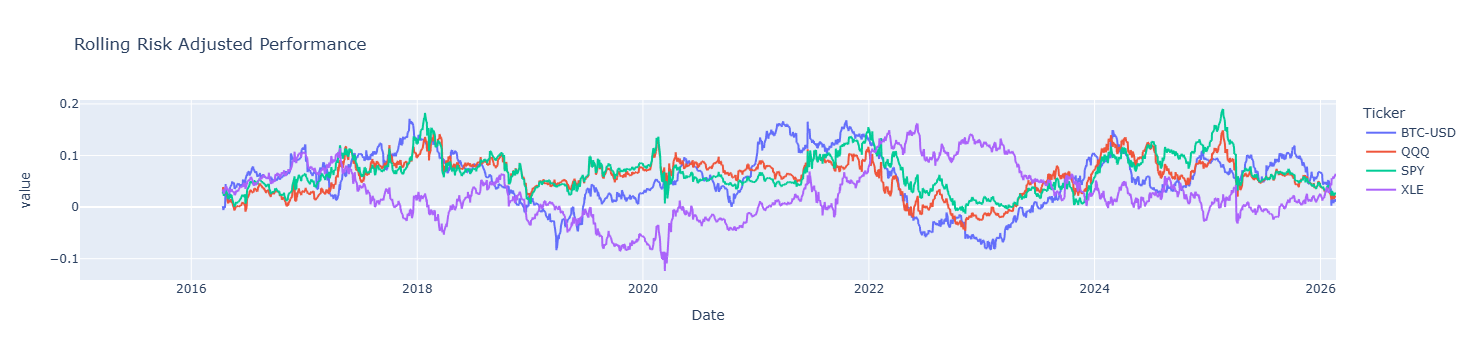

In [31]:
rolling_sharpe = (
    returns.rolling(252).mean() /
    returns.rolling(252).std()
)

px.line(
    rolling_sharpe,
    title="Rolling Risk Adjusted Performance"
)

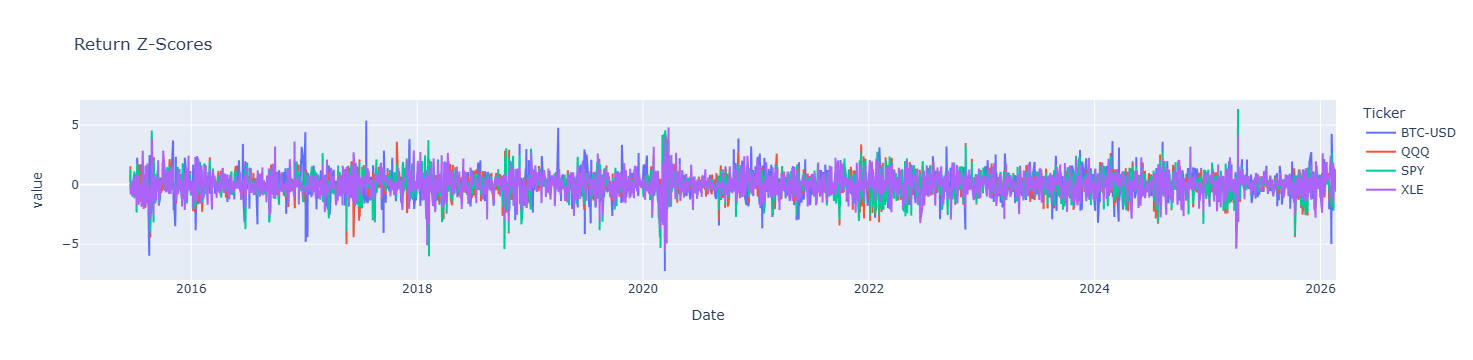

In [32]:
z_returns = (
    returns - returns.rolling(90).mean()
) / returns.rolling(90).std()

px.line(
    z_returns,
    title="Return Z-Scores"
)

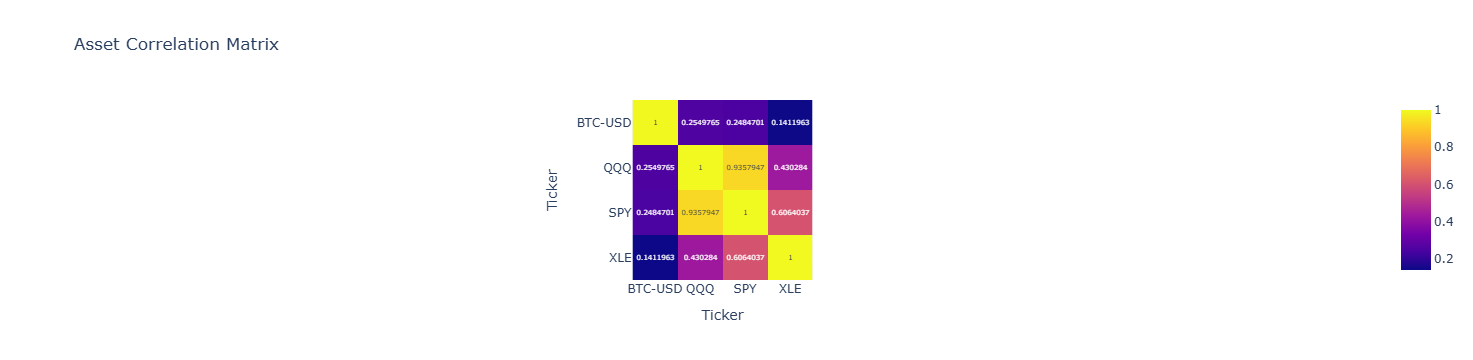

In [8]:
corr = returns.corr()

px.imshow(
    corr,
    text_auto=True,
    title="Asset Correlation Matrix"
)

In [20]:
rolling_corr = (
    returns["BTC-USD"]
    .rolling(90)
    .corr(returns["QQQ"])
)

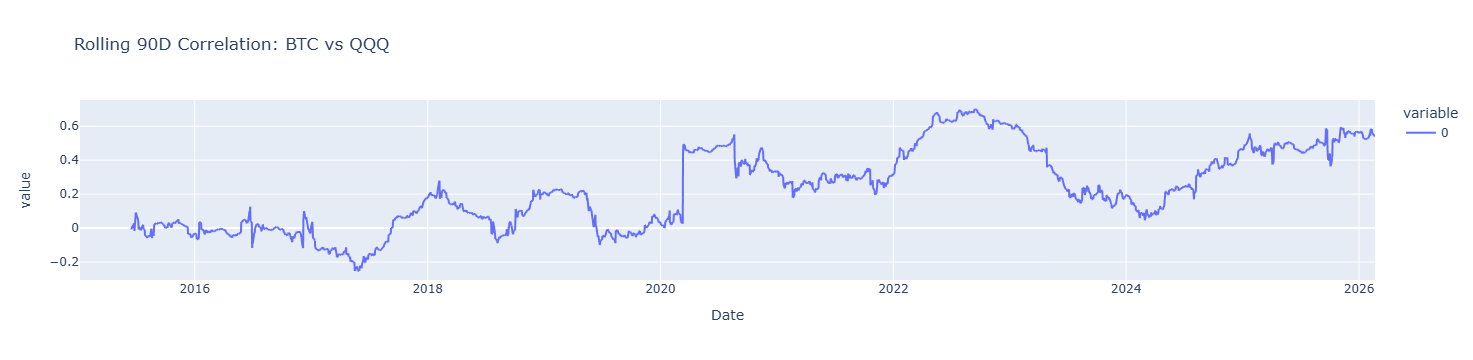

In [21]:
import plotly.express as px

px.line(
    rolling_corr,
    title="Rolling 90D Correlation: BTC vs QQQ"
)